<a href="https://colab.research.google.com/github/ealeongomez/Machine-Learning/blob/main/DR_KernelPrincipalCompoenetAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, make_circles
from sklearn.decomposition import KernelPCA
from scipy.spatial.distance import pdist, squareform


#**Load data**

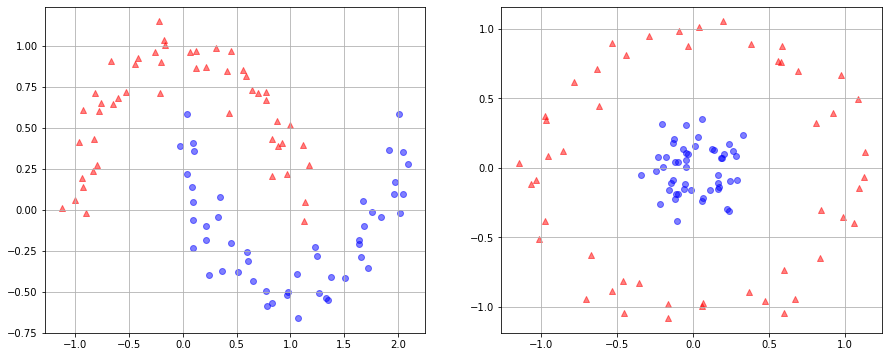

In [ ]:
X_1, y_1 = make_moons(n_samples=100, random_state=123, noise=0.1)
X_2, y_2 = make_circles(n_samples=100, random_state=123, noise=0.1, factor=0.2)

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.scatter(X_1[y_1==0, 0], X_1[y_1==0, 1], color='r', marker='^', alpha=0.5)
plt.scatter(X_1[y_1==1, 0], X_1[y_1==1, 1], color='b', marker='o', alpha=0.5)
plt.grid()
plt.subplot(122)
plt.scatter(X_2[y_2==0, 0], X_2[y_2==0, 1], color='r', marker='^', alpha=0.5)
plt.scatter(X_2[y_2==1, 0], X_2[y_2==1, 1], color='b', marker='o', alpha=0.5)
plt.grid()
plt.show()


#**Function Kernel and Kernel Trick**

See:

Smola, A. "Support vector machines, regularization, optimization, and beyond." Learning with Kernels (2002).

Schölkopf, Bernhard, Alexander Smola, and Klaus-Robert Müller. "Kernel principal component analysis." International conference on artificial neural networks. Springer, Berlin, Heidelberg, 1997.


$$\phi: R^{d} \rightarrow R^{k} \; (k>>d)$$

$$\vec{x}=[x_1, x_2]^\top$$

$$\downarrow \phi$$

$$z = \left[ x_1^2, \sqrt(2x_1^2x_2), x_2^2 \right]^\top$$


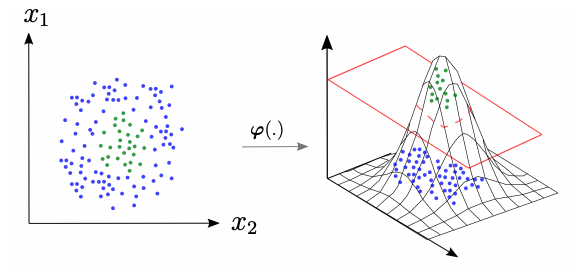

$$\sigma_{jk} = \frac{1}{n} \sum_{i=1}^{n} \left(x_{j}^{(i)}-\mu_j \right) \left(x_{k}^{(i)}-\mu_k \right) $$

$$\Sigma = \frac{1}{n} \sum_{i=1}^{n} \textbf{x}^{i} \textbf{x}^{(k)^{\top}} $$

$$\Sigma = \frac{1}{n} \sum_{i=1}^{n} \phi( \textbf{x}^{i} ) \phi( \textbf{x}^{(k)^{\top}} ) $$

$$ \vdots $$

$$ \kappa = \phi(X) \phi(X)^{\top}  $$


Types of Kernels: 

1. Kernel polynomial:

$$\kappa \left( x^{(i)}, x^{(j)} \right) = \left( x^{(i)^{\top}} x^{(j)} + \theta \right)^{P} $$

Donde $\theta$ es el umbral y $P$ es la potencia 
 
2. Kernel of the hyperbolic tangent

$$ \kappa \left( x^{(i)}, x^{(j)} \right) = \tanh{ \left( \eta \textbf{x}^{(i)^{^\top}} \textbf{x}^{(j)} + \theta \right) }$$

3. Gaussian Kernel

$$ \kappa \left( x^{(i)}, x^{(j)} \right) = exp \left(  - \gamma || \textbf{x}^{(i)} - \textbf{x}^{(j)} ||^2 \right)$$

Donde $\gamma = \frac{1}{2\sigma}$


La matriz kernelizada estara dada por: 

$$\kappa = \begin{bmatrix}{\kappa\left(\textbf{x}^{(1)}, \textbf{x}^{(1)}\right)}&{\kappa\left(\textbf{x}^{(1)}, \textbf{x}^{(2)}\right)}&{\ldots}&{\kappa\left(\textbf{x}^{(1)}, \textbf{x}^{(1)}\right)}
\\
{\kappa\left(\textbf{x}^{(2)}, \textbf{x}^{(1)}\right)}&{\kappa\left(\textbf{x}^{(2)}, \textbf{x}^{(2)}\right)}&{\ldots}&{\kappa\left(\textbf{x}^{(2)}, \textbf{x}^{(n)}\right)}
\\
{\vdots}&{\vdots}&{\ddots}&{\vdots}
\\
{\kappa\left(\textbf{x}^{(2)}, \textbf{x}^{(1)}\right)}&{\kappa\left(\textbf{x}^{(2)}, \textbf{x}^{(2)}\right)}&{\ldots}&{\kappa\left(\textbf{x}^{(n)}, \textbf{x}^{(n)}\right)}\end{bmatrix}$$




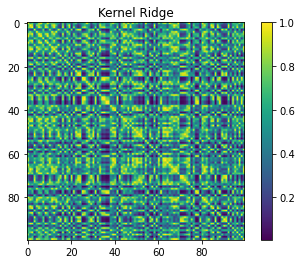

In [ ]:
sigma = 1

dists = squareform(pdist(X_1, 'euclidean'))
K = np.exp(-(dists**2)/(2*sigma**2))

plt.imshow(K)
plt.colorbar()
plt.title("Kernel Ridge")
plt.show()


# "*Kernel Trick*"

$$ \sum = \frac{1}{n} \sum_{i=1}^{n} \phi \left( x^{(i)}  \right) \phi \left( x^{(i)}  \right)^{\top} = \frac{1}{N} \phi \left( X \right)^{\top} \phi \left( X \right)$$

Si re-escribimos la ecuación del autovector como: 

$$ \textbf{v} = \sum_{i=1}^{n} a^{(i)} \phi \left( x^{(i)} \right) = \phi \left( X \right) \textbf{a}$$

Como $\sum \textbf{v} = \lambda \textbf{v}$, tendremos: 

$$ \frac{1}{n} \phi \left( \textbf{X} \right)^{\top} \phi \left( \textbf{X} \right) \phi \left( \textbf{X} \right)^{\top} \textbf{a} = \lambda \phi \left( \textbf{X} \right)^{\top} \textbf{a} $$

Multiplicando por $\phi \left( \textbf{X} \right)  $

$$ \frac{1}{n} \phi \left( \textbf{X} \right) \phi \left( \textbf{X} \right)^{\top} \phi \left( \textbf{X} \right) \phi \left( \textbf{X} \right)^{\top} \textbf{a} = \lambda \phi \left( \textbf{X} \right) \phi \left( \textbf{X} \right)^{\top} \textbf{a} $$

$$ \frac{1}{n} \phi \left( \textbf{X} \right) \phi \left( \textbf{X} \right)^{\top} \textbf{a} = \lambda \textbf{a} $$

$$ \frac{1}{n} \textbf{K} \textbf{a} = \lambda \textbf{a} $$

$$ \textbf{K} = \phi \left( \textbf{X} \right) \phi \left( \textbf{X} \right)^{\top}  $$



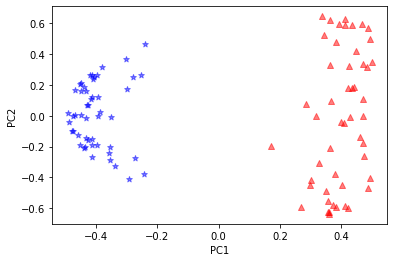

In [ ]:
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=1.5)

X_KernelPCA = scikit_kpca.fit_transform(X_2)

plt.scatter(X_KernelPCA[y_2==0, 0], X_KernelPCA[y_2==0, 1], color='r', marker='^', alpha=0.5)
plt.scatter(X_KernelPCA[y_2==1, 0], X_KernelPCA[y_2==1, 1], color='b', marker='*', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
